In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('data.txt', sep='\t')
X = df.drop(columns='class')
y = df['class']
df

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.008950,0.31273,0.22887,0.30827,0.31809,0.14087,0.187430,0.179580,0.133370,0.123980,...,0.18396,0.24481,0.24823,0.24421,0.011351,0.047512,0.037526,0.048370,1.86730,0
1,0.007176,0.43848,0.25424,0.23050,0.21604,0.11172,0.129290,0.132720,0.050820,0.096595,...,0.24823,0.23406,0.28762,0.25840,0.037526,0.018917,0.064708,0.042664,1.90070,0
2,0.008359,0.33260,0.34880,0.27845,0.18023,0.15602,0.138980,0.059548,0.129600,0.106360,...,0.25040,0.41050,0.28564,0.33738,0.036879,0.138530,0.057896,0.099378,1.79210,0
3,0.008551,0.25633,0.51625,0.26852,0.07859,0.12234,0.096952,0.078739,0.124840,0.208140,...,0.28046,0.26461,0.30164,0.28130,0.058385,0.084239,0.081078,0.075487,1.82950,0
4,0.011094,0.25090,0.42850,0.47452,0.40191,0.23072,0.223710,0.375130,0.463220,0.331820,...,0.34773,0.30431,0.26186,0.29115,0.109810,0.109990,0.047338,0.084213,1.84340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.006729,0.44722,0.32865,0.20867,0.19787,0.20196,0.132790,0.042762,0.041134,0.087094,...,0.49208,0.37843,0.37433,0.42941,0.200740,0.103490,0.101470,0.151370,1.40410,0
9996,0.007091,0.51613,0.44840,0.37825,0.38330,0.23285,0.124240,0.031416,0.062750,0.047443,...,0.36378,0.37961,0.43759,0.49082,0.094391,0.090387,0.139450,0.219530,1.28750,0
9997,0.007520,0.21860,0.23257,0.23291,0.24827,0.22286,0.112160,0.082840,0.074977,0.075951,...,0.43765,0.40372,0.41163,0.45347,0.140720,0.096851,0.106250,0.147700,1.24640,0
9998,0.009628,0.51176,0.44947,0.38360,0.34326,0.39154,0.102860,0.058244,0.115740,0.136440,...,0.48762,0.75303,0.69701,0.74592,0.177730,0.500270,0.466900,0.498850,0.61130,0


In [4]:
df['class'].value_counts() / len(df)

0    0.9564
1    0.0436
Name: class, dtype: float64

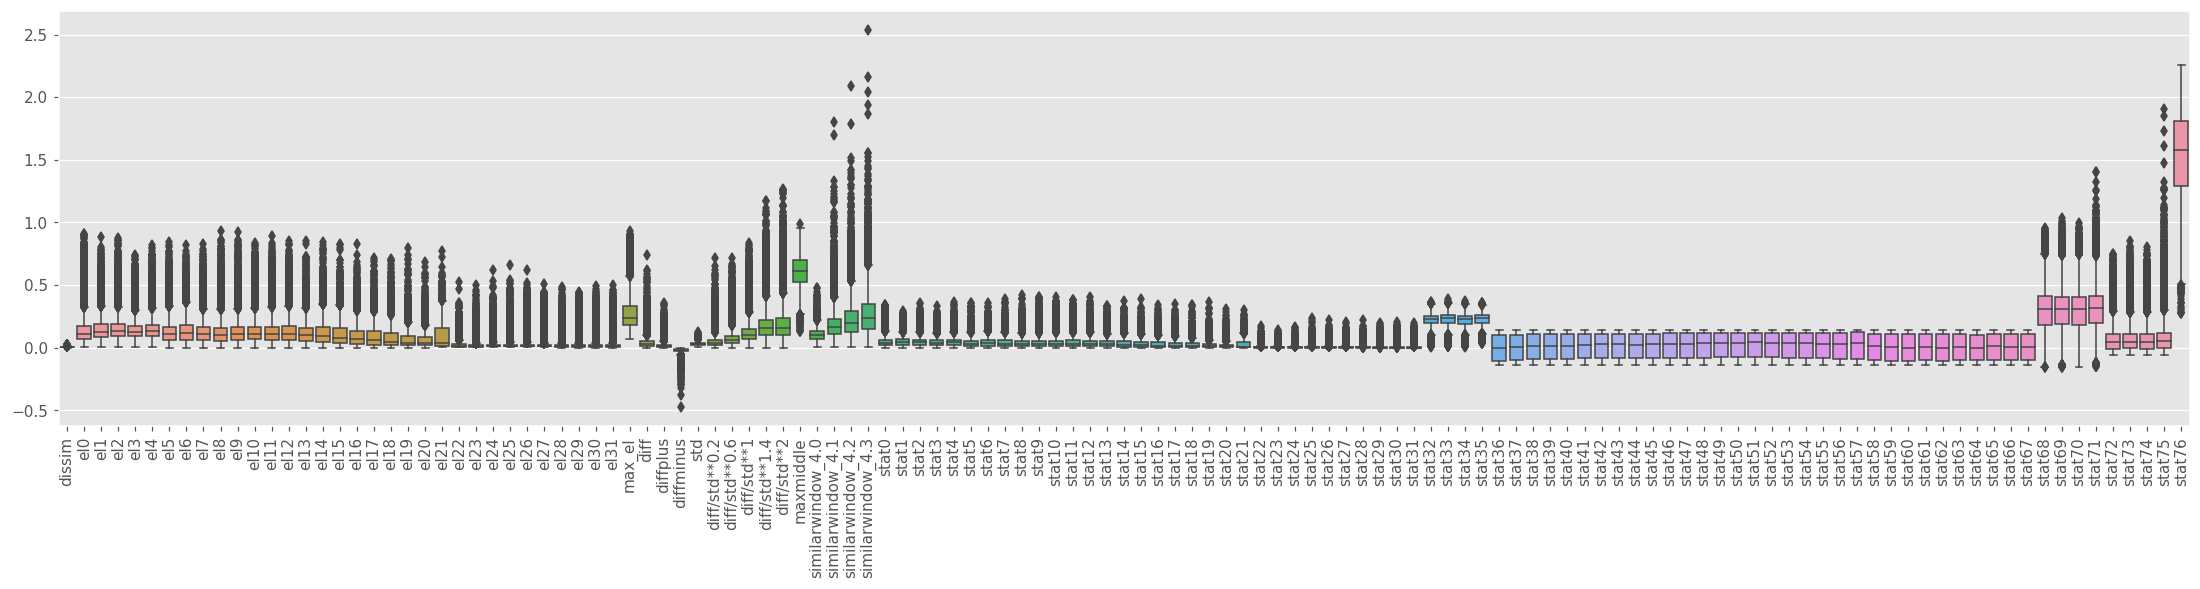

In [5]:
plt.subplots(figsize=(25, 5))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

In [6]:
from sklearn.decomposition import PCA

[0.32580626 0.10547723]
0.43128349562047114


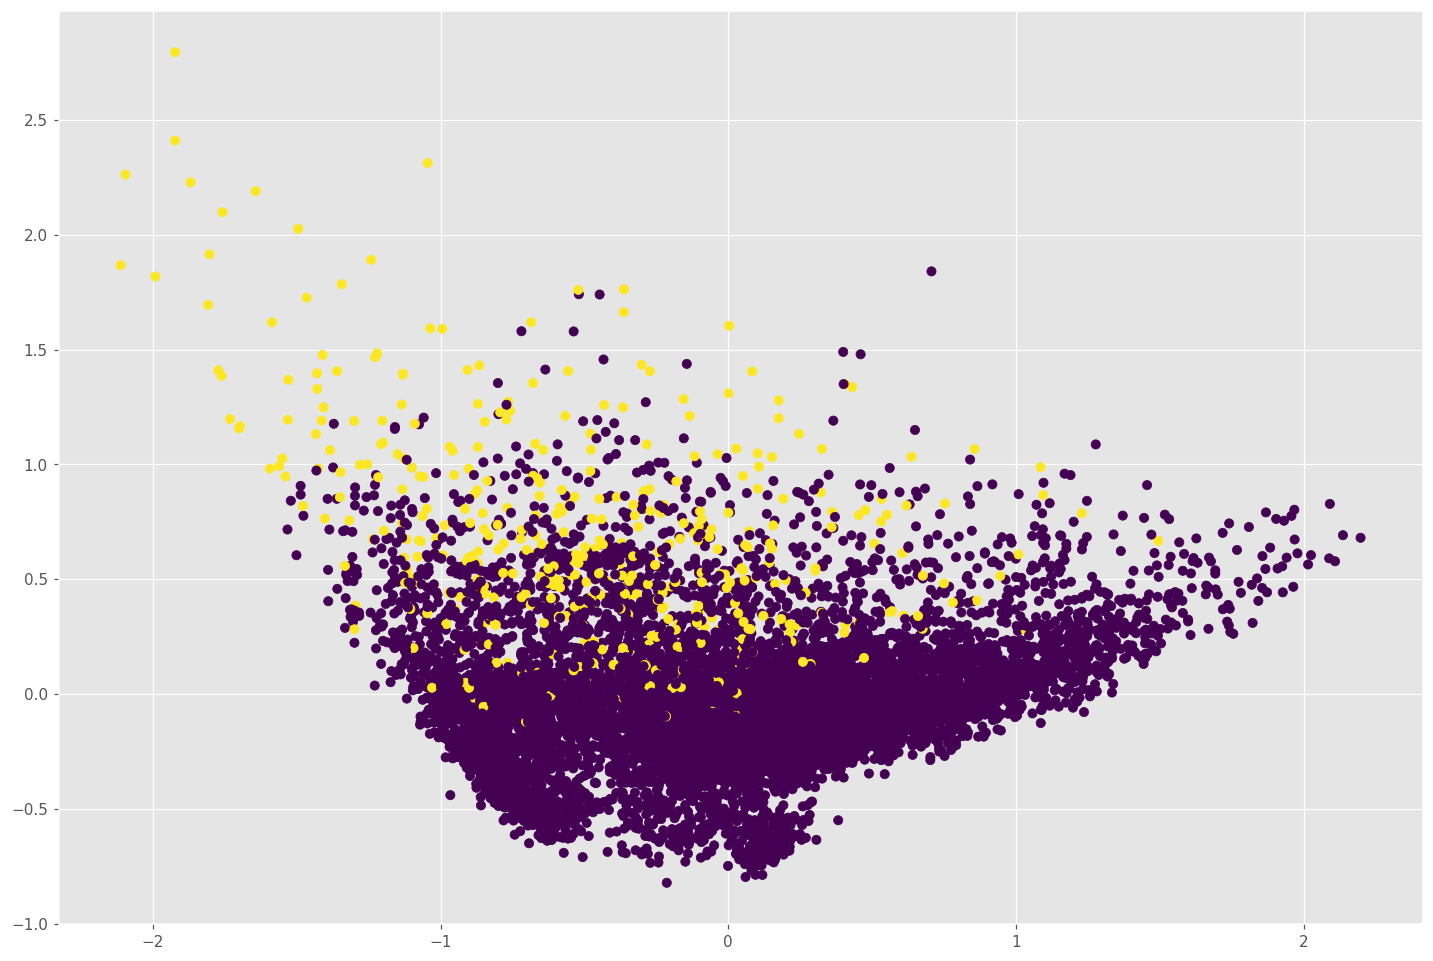

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
plt.scatter(*X_pca.T, c=y)

In [69]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

#import plotly.express as px
#fig = px.scatter_3d(X_pca, x=0, y=1, z=2, color=y)
#fig.update_traces(marker=dict(size=2))
#fig.show()

[0.32580626 0.10547723 0.07465495]
0.5059384437789509


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier

classes = dict(
    ada_boost_gnb=lambda: AdaBoostClassifier(GaussianNB()),
    ada_boost_tree=lambda: AdaBoostClassifier(DecisionTreeClassifier()),
    voting_tree_gnb=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    stacking_tree_gnb=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB())], n_jobs=4),
    voting_gnb_qda=lambda: VotingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    stacking_gnb_qda=lambda: StackingClassifier([('qda', QuadraticDiscriminantAnalysis()), ('gnb', GaussianNB())], n_jobs=4),
    voting_tree_gnb_svc=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    stacking_tree_gnb_svc=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('svc', SVC())], n_jobs=4),
    voting_tree_gnb_qda=lambda: VotingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    stacking_tree_gnb_qda=lambda: StackingClassifier([('tree', DecisionTreeClassifier()), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())], n_jobs=4),
    random_forest=lambda: RandomForestClassifier(n_jobs=4),
)

fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2021)
res = []
for name, cls in classes.items():
    for tr_idx, te_idx in fold.split(X, y):
        for norm in [False, True]:
            X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
            y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
            if norm:
                scaler = StandardScaler()
                X_tr = scaler.fit_transform(X_tr)
                X_te = scaler.transform(X_te)
            model = cls()
            model.fit(X_tr, y_tr)
            Y_te = model.predict(X_te)
            res += [dict(name=name, gmean=geometric_mean_score(y_te, Y_te), norm=norm)]
res = pd.DataFrame(res)
res

,name,gmean,norm
0,ada_boost_gnb,0.665676,False
1,ada_boost_gnb,0.793524,True
2,ada_boost_gnb,0.304997,False
3,ada_boost_gnb,0.677059,True
4,ada_boost_gnb,0.561885,False
...,...,...,...
215,random_forest,0.890482,True
216,random_forest,0.849675,False
217,random_forest,0.850570,True
218,random_forest,0.851464,False


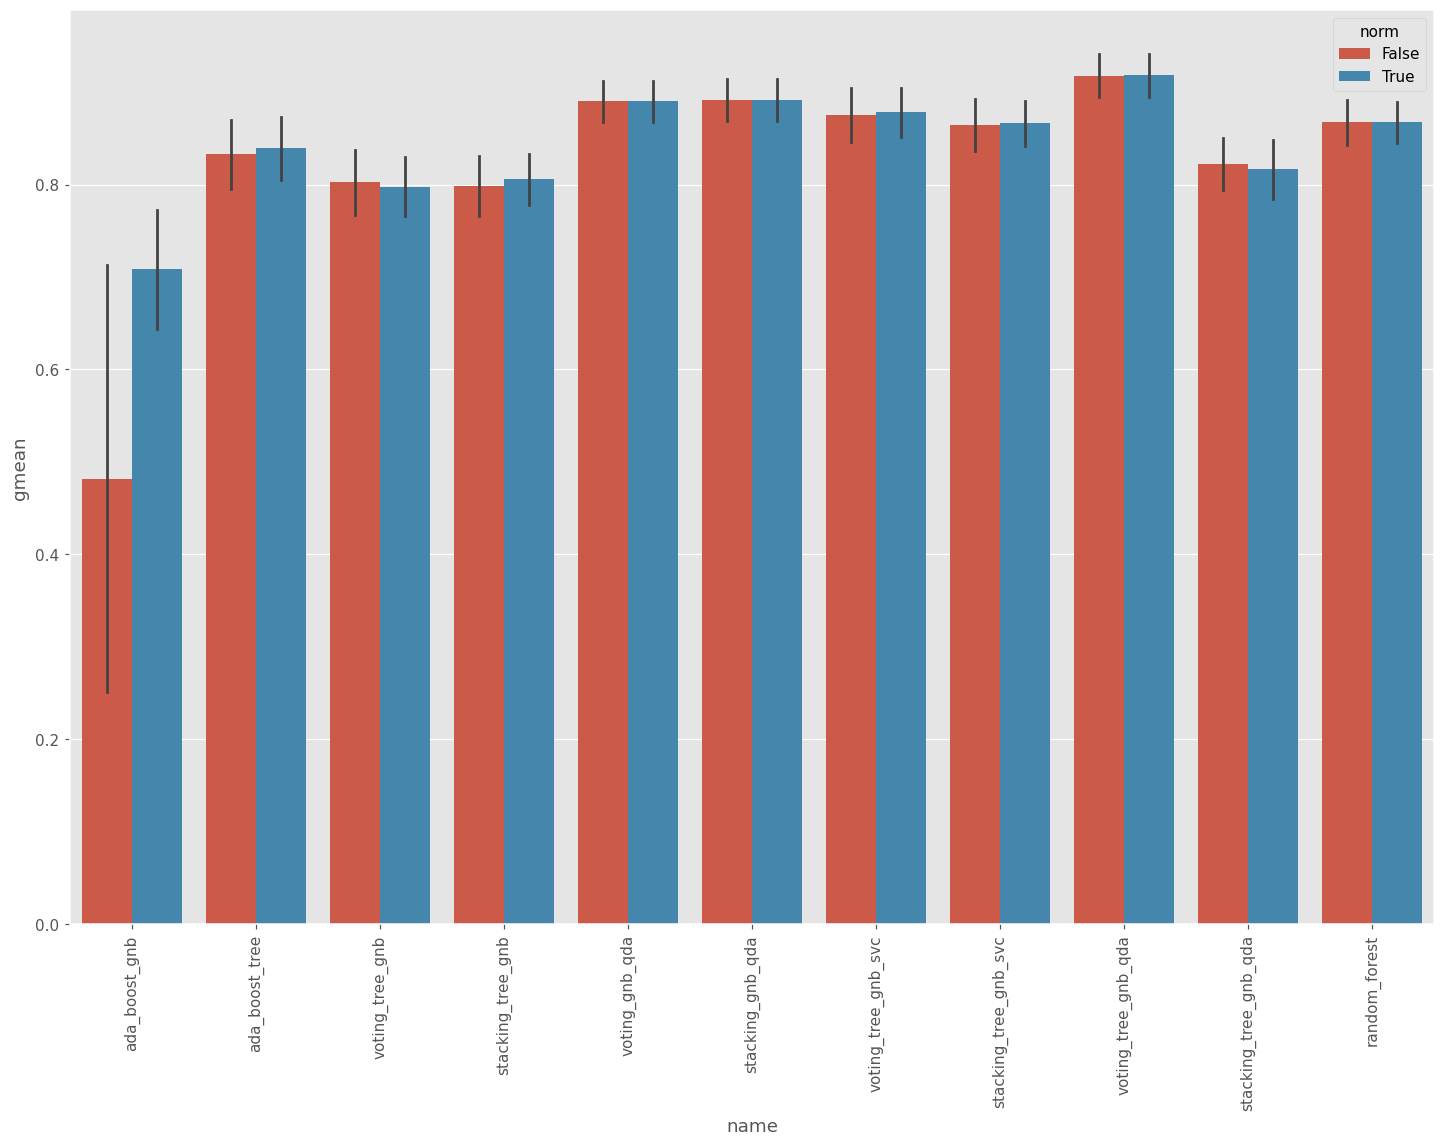

In [72]:
import seaborn as sns
plt.style.use('ggplot')
sns.barplot(x='name', y='gmean', hue='norm', ci='sd', data=res)
plt.xticks(rotation=90)
plt.show()

In [66]:
mean = res.groupby('name').mean()
std = res.groupby('name').std()
pd.DataFrame({
    'gmean (avg)': mean.gmean,
    'gmean (std)': std.gmean,
}, index=mean.index)

,gmean (avg),gmean (std)
name,,
ada_boost_gnb,0.708137,0.067358
ada_boost_tree,0.828619,0.035904
random_forest,0.870119,0.017397
stacking_gnb_qda,0.891539,0.023882
stacking_tree_gnb,0.792923,0.028011
stacking_tree_gnb_qda,0.823267,0.035351
stacking_tree_gnb_svc,0.865104,0.029434
voting_gnb_qda,0.889995,0.023756
voting_tree_gnb,0.801342,0.030774


In [173]:
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_validate, RandomizedSearchCV

grid = dict(
    vote__tree__max_depth=[2, 4, 8, 10, 15, 20, None],
    vote__tree__max_features=['sqrt', 'log2', None],
    vote__tree__min_samples_leaf=[2, 3, 4, 5],
    vote__gnb__var_smoothing=[1e-9, 1e-8, 1e-7],
    vote__qda__reg_param=np.linspace(0, 1, 20),
    vote__voting=['soft', 'hard'],
)

iters = 20
k_fold = 10
args = dict(cv=k_fold, n_jobs=4, scoring=dict(gmean=make_scorer(geometric_mean_score)))
        
def Base(class_weight):
    return VotingClassifier([('tree', DecisionTreeClassifier(class_weight=class_weight)), ('gnb', GaussianNB()), ('qda', QuadraticDiscriminantAnalysis())])
            
tree = cross_validate(DecisionTreeClassifier(), X, y, **args)
gnb = cross_validate(GaussianNB(), X, y, **args)
qda = cross_validate(QuadraticDiscriminantAnalysis(), X, y, **args)

model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight=None) ),
])
base_unbalanced = cross_validate(model, X, y, **args)
            
model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight='balanced') ),
])
base_balanced = cross_validate(model, X, y, **args)

model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight=None) ),
])
search = RandomizedSearchCV(model, grid, n_iter=iters, refit='gmean', **args)
tuned_unbalanced = search.fit(X, y)

model = Pipeline([
    ( 'scale', StandardScaler() ),
    ( 'vote', Base(class_weight='balanced') ),
])
search = RandomizedSearchCV(model, grid, n_iter=iters, refit='gmean', **args)
tuned_balanced = search.fit(X, y)

In [196]:
tuned_balanced.best_params_

{'vote__voting': 'soft',
 'vote__tree__min_samples_leaf': 2,
 'vote__tree__max_features': None,
 'vote__tree__max_depth': 2,
 'vote__qda__reg_param': 0.2631578947368421,
 'vote__gnb__var_smoothing': 1e-07}

,name,gmean,gmean_std
0,vote,0.907694,0.039963
1,vote (tuned),0.914993,0.032825
2,vote (tuned + balanced),0.929725,0.027599


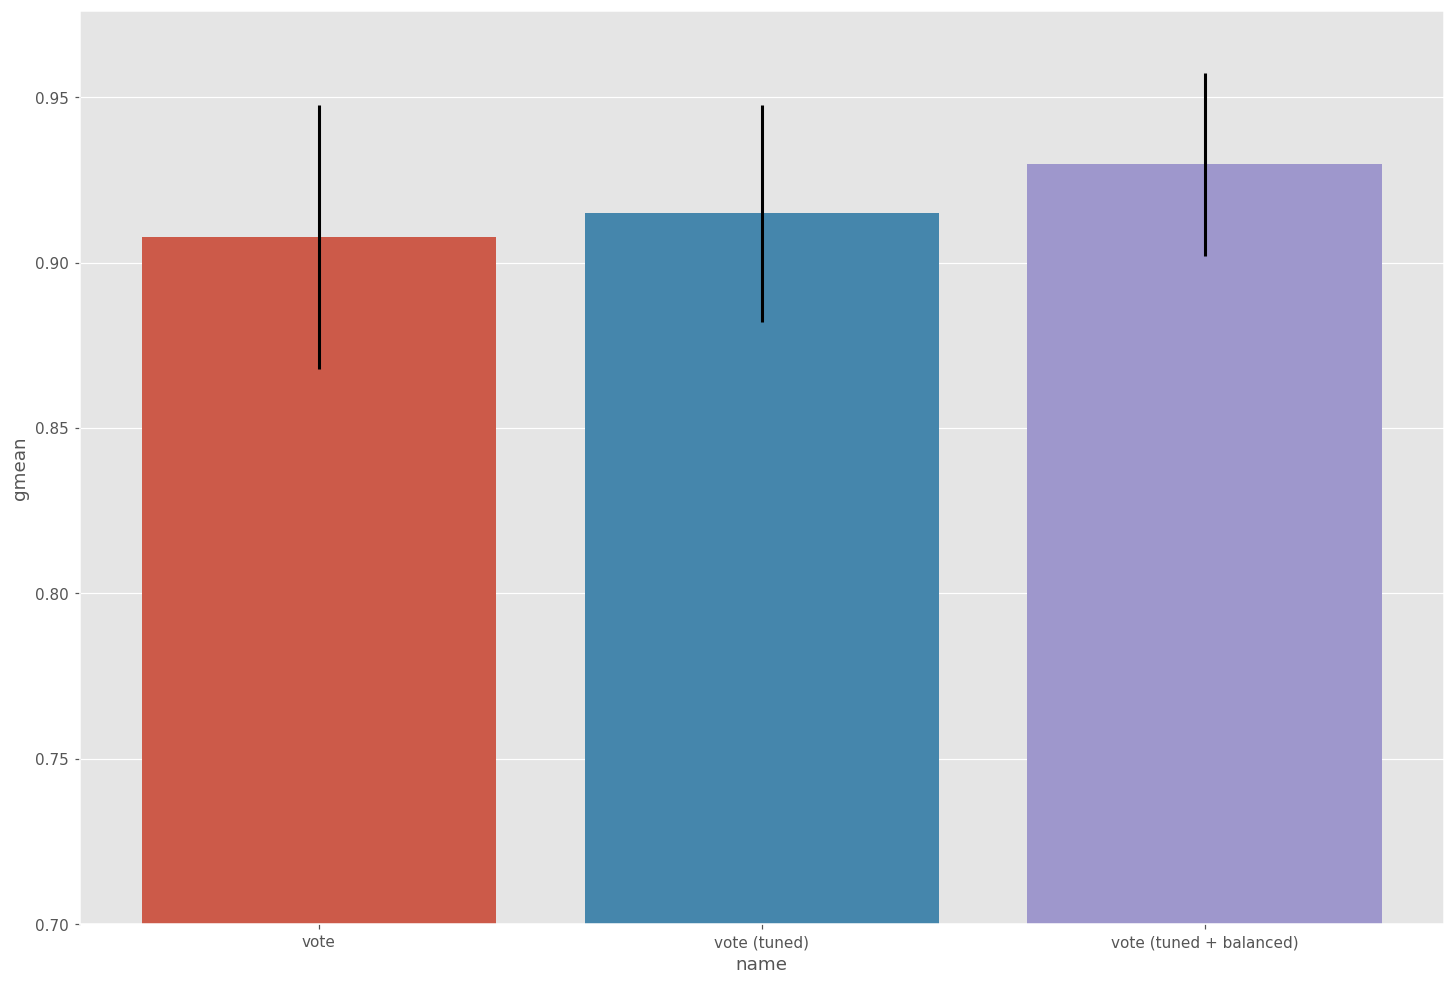

In [192]:
data = pd.DataFrame([
    #dict(name='tree', gmean=tree['test_gmean'].mean()),
    #dict(name='gnb', gmean=gnb['test_gmean'].mean()),
    #dict(name='qda', gmean=qda['test_gmean'].mean()),
    dict(name='vote', gmean=base_balanced['test_gmean'].mean(), gmean_std=base_balanced['test_gmean'].std()),
    dict(name='vote (tuned)', gmean=tuned_unbalanced.cv_results_['mean_test_gmean'].max(), gmean_std=tuned_unbalanced.cv_results_['std_test_gmean'].min()),
    #dict(name='base + balance', gmean=base_unbalanced['test_gmean'].mean()),
    dict(name='vote (tuned + balanced)', gmean=tuned_balanced.cv_results_['mean_test_gmean'].max(), gmean_std=tuned_balanced.cv_results_['std_test_gmean'].min()),
])
sns.barplot(x='name', y='gmean', ci='gmean_std', data=data)
#plt.xticks(rotation=-45)
plt.ylim(0.7)
plt.errorbar(x=[0, 1, 2], y=data.gmean, yerr=data.gmean_std, fmt='none', c='k', lw=2)
data

Text(0.5, 0.98, 'vote')

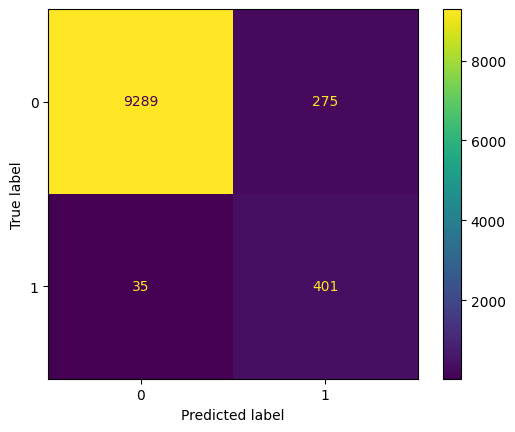

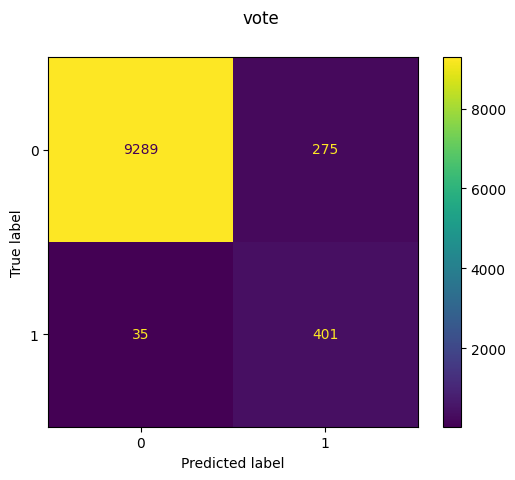

In [230]:
from sklearn.metrics import plot_confusion_matrix

#model = Pipeline([
#    #( 'scale', StandardScaler() ),
#    ( 'vote', Base(class_weight='balanced') ),
#])
#plain = cross_validate(model, X, y, return_estimator=True, **args)

plt.style.use('default')
#plot_confusion_matrix(plain['estimator'][np.argmax(plain['test_gmean'])], X, y) 
plot_confusion_matrix(tuned_balanced.best_estimator_, X, y) 
plot_confusion_matrix(tuned_balanced.best_estimator_, X, y) 
plt.suptitle('vote')

In [81]:
fold = StratifiedKFold(n_splits=10, shuffle=True)
results = []
scores = []

for tr_idx, te_idx in fold.split(X, y):
    X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
    y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    model = QuadraticDiscriminantAnalysis()
    model = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid=grid, cv=10,
                         refit='acc',
                         scoring=dict(
                             acc=make_scorer(accuracy_score),
                             rocauc=make_scorer(roc_auc_score),
                             gmean=make_scorer(geometric_mean_score)))
    res = model.fit(X_tr, y_tr)
    Y_te = model.predict(X_te)
    
    results += [res]
    scores += [dict(acc=accuracy_score(y_te, Y_te),
                 gmean=geometric_mean_score(y_te, Y_te),
                 rocauc=roc_auc_score(y_te, Y_te))]

In [93]:
pd.DataFrame(scores).mean()

acc       0.982400
gmean     0.941513
rocauc    0.942743
dtype: float64

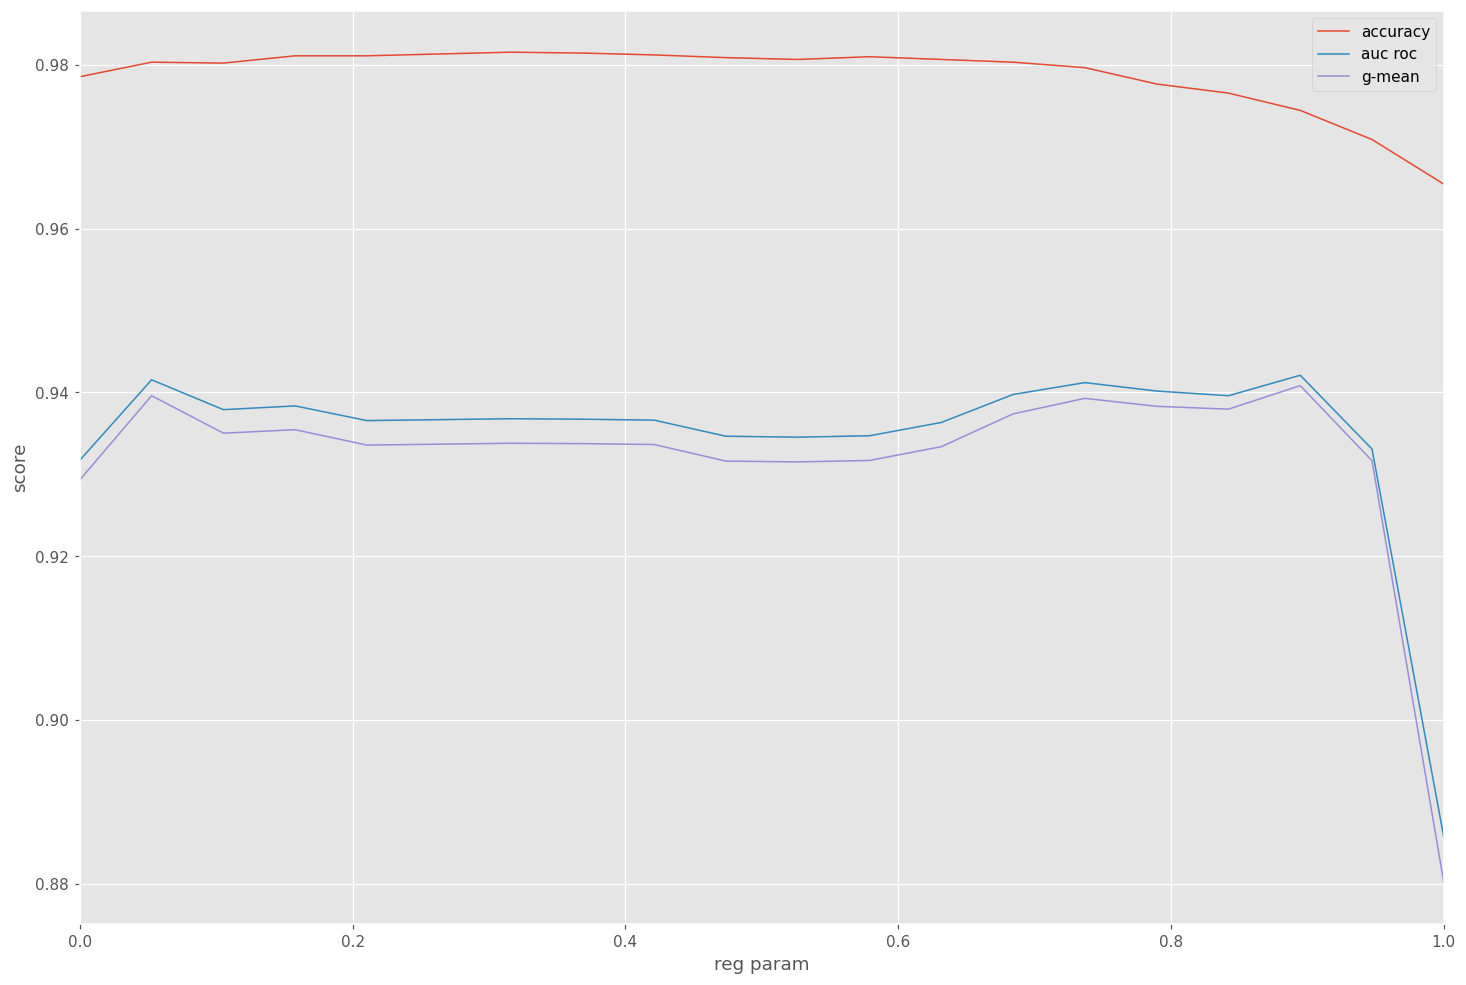

In [92]:
xs = grid['reg_param']
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_acc'] for i in range(10)]).mean(0), label='accuracy')
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_rocauc'] for i in range(10)]).mean(0), label='auc roc')
plt.plot(xs, np.array([results[0].cv_results_[f'split{i}_test_gmean'] for i in range(10)]).mean(0), label='g-mean')
plt.xlabel('reg param')
plt.ylabel('score')
plt.margins(x=0)
plt.legend()

In [96]:
from sklearn.linear_model import Ridge
scaler = StandardScaler()
ridge = Ridge()
X_tr = scaler.fit_transform(X)
ridge.fit(X_tr, y)

Ridge()

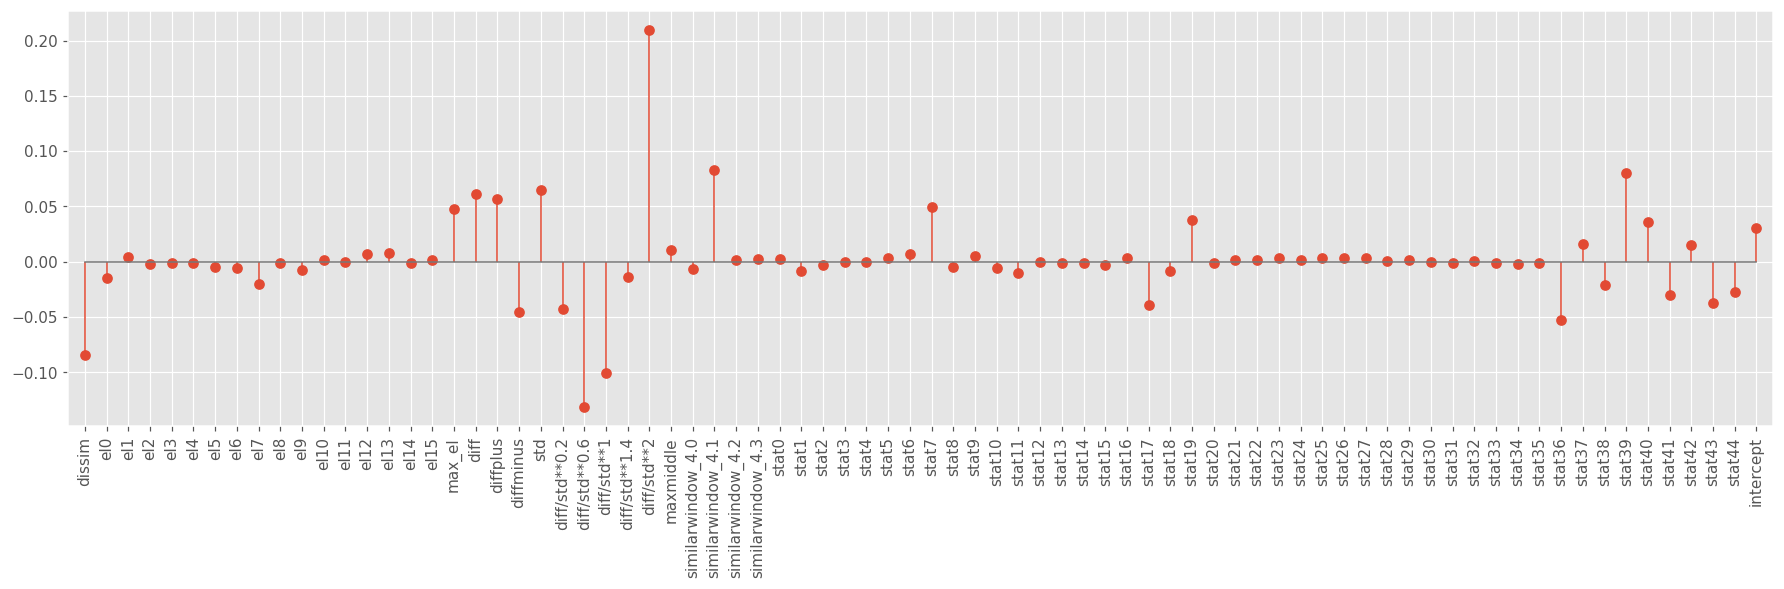

In [97]:
plt.figure(figsize=(20, 5))
plt.stem(list(df.columns[:-1]) + ['intercept'], list(ridge.coef_) + [ridge.intercept_])
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.show()

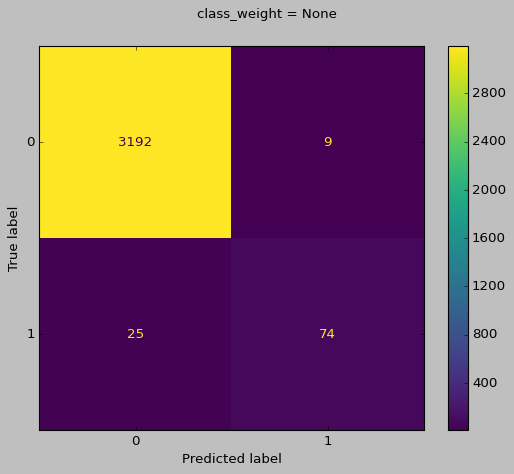

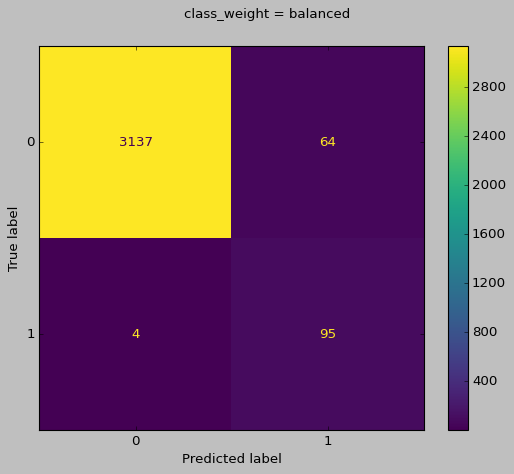

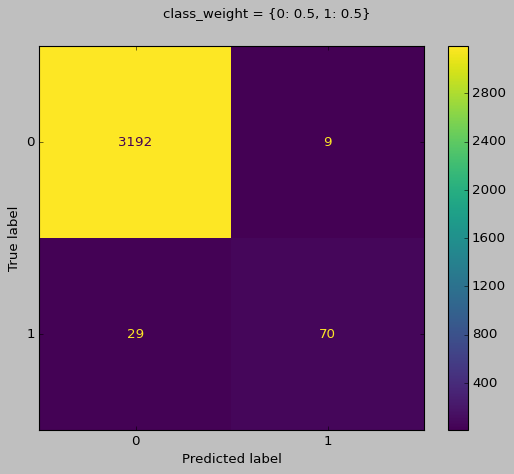

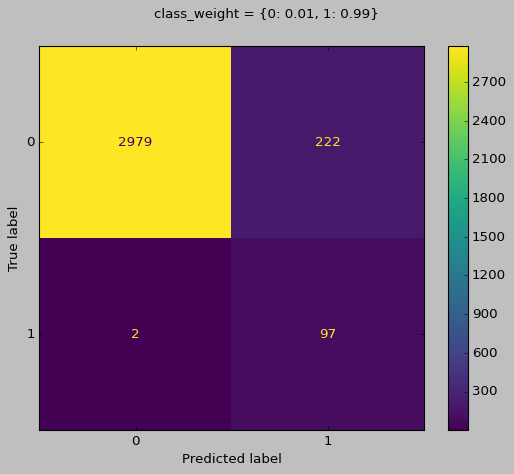

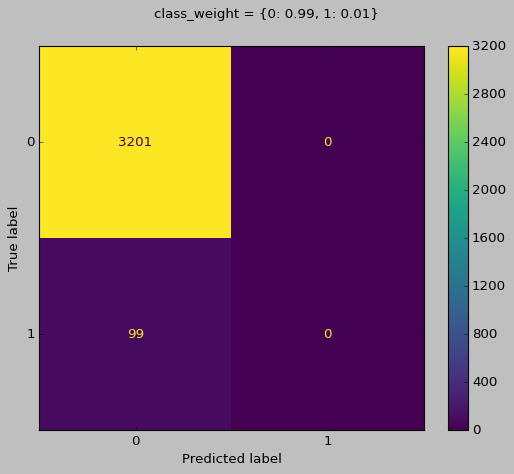

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

for w in [None, 'balanced', {0:0.5, 1:0.5}, {0:0.01, 1:0.99}, {0:0.99, 1:0.01}]:
    model = SVC(class_weight=w)
    model.fit(X_tr, y_tr)
    plot_confusion_matrix(model, X_te, y_te) 
    plt.suptitle(f'class_weight = {w}')

In [107]:
plt.rc('figure', figsize=(5,5))
plt.style.use('classic')
#plt.style.available

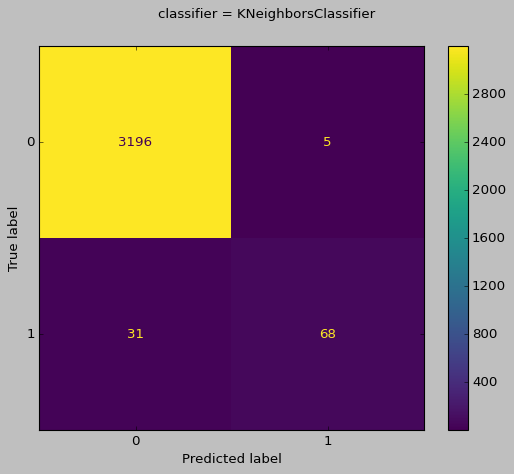

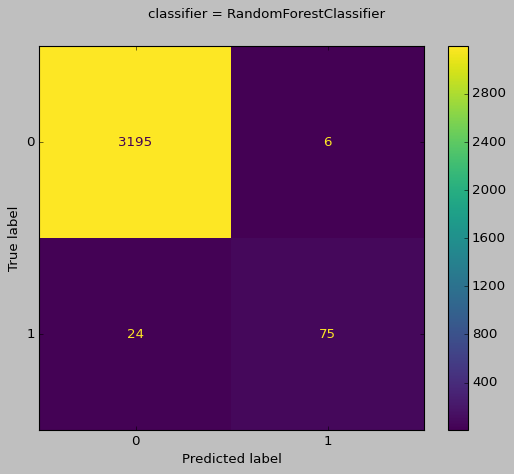

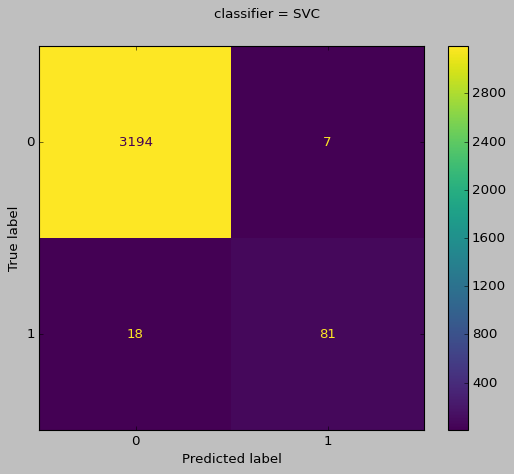

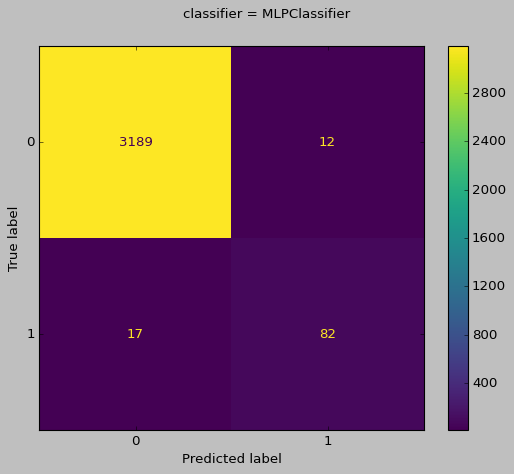

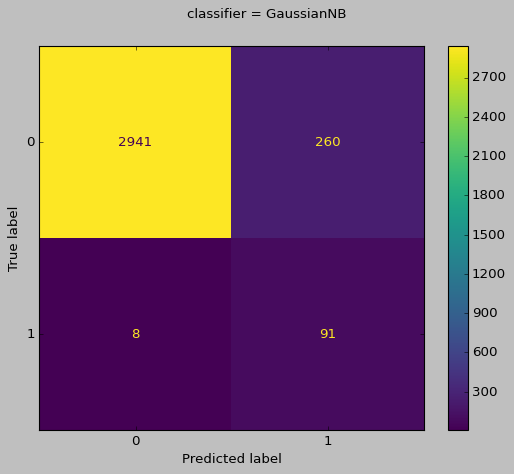

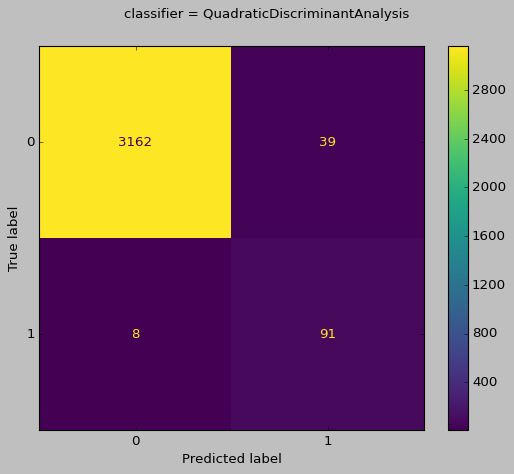

In [123]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
for cls in classes:
    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)
    model = cls()
    model.fit(X_tr, y_tr)
    plot_confusion_matrix(model, X_te, y_te) 
    plt.suptitle(f'classifier = {cls.__name__}')